In [139]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic')
# 주피터 노트북을 사용하는 경우에는 다음처럼 매직(magic) 명령으로 노트북 내부에 그림을 표시하도록 지정해야 한다.
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
card_re = pd.read_csv("CARD_SPENDING_RESIDENT/CARD_SPENDING_RESIDENT.txt", sep ="\t")

In [5]:
date_table = pd.read_csv("date_table.csv")

In [3]:
card_re.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20190201,110,517,10,F,25,11,595
1,20190201,110,517,10,F,50,5,243
2,20190201,110,517,10,F,55,5,27
3,20190201,110,517,10,M,20,11,243
4,20190201,110,517,10,M,25,11,433


In [7]:
date_table

,STD_DD,year,month,day,week_num,day_of_week,day_of_week_kr
0,20190201,2019,2,1,4,4,금
1,20190202,2019,2,2,4,5,토
2,20190203,2019,2,3,5,6,일
3,20190204,2019,2,4,5,0,월
4,20190205,2019,2,5,5,1,화
...,...,...,...,...,...,...,...
236,20200527,2020,5,27,21,2,수
237,20200528,2020,5,28,21,3,목
238,20200529,2020,5,29,21,4,금
239,20200530,2020,5,30,21,5,토


In [13]:
card = card_re.merge(date_table, how='left',on = "STD_DD")

In [14]:
card

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,year,month,day,week_num,day_of_week,day_of_week_kr
0,20190201,110,517,10,F,25,11,595,2019,2,1,4,4,금
1,20190201,110,517,10,F,50,5,243,2019,2,1,4,4,금
2,20190201,110,517,10,F,55,5,27,2019,2,1,4,4,금
3,20190201,110,517,10,M,20,11,243,2019,2,1,4,4,금
4,20190201,110,517,10,M,25,11,433,2019,2,1,4,4,금
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537748,20200531,350,720,81,M,45,19,127,2020,5,31,22,6,일
2537749,20200531,350,720,81,M,50,33,211,2020,5,31,22,6,일
2537750,20200531,350,720,81,M,55,9,61,2020,5,31,22,6,일
2537751,20200531,350,720,81,M,60,19,194,2020,5,31,22,6,일


In [16]:
card_2019 = card[card['year'] == 2019]
card_2020 = card[card['year'] == 2020]

In [17]:
card_2019.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,year,month,day,week_num,day_of_week,day_of_week_kr
0,20190201,110,517,10,F,25,11,595,2019,2,1,4,4,금
1,20190201,110,517,10,F,50,5,243,2019,2,1,4,4,금
2,20190201,110,517,10,F,55,5,27,2019,2,1,4,4,금
3,20190201,110,517,10,M,20,11,243,2019,2,1,4,4,금
4,20190201,110,517,10,M,25,11,433,2019,2,1,4,4,금


In [18]:
card_2020.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,year,month,day,week_num,day_of_week,day_of_week_kr
1310606,20200201,110,517,10,F,25,5,79,2020,2,1,4,5,토
1310607,20200201,110,517,10,M,20,16,1054,2020,2,1,4,5,토
1310608,20200201,110,517,10,M,25,11,269,2020,2,1,4,5,토
1310609,20200201,110,517,10,M,30,11,448,2020,2,1,4,5,토
1310610,20200201,110,517,10,M,45,5,343,2020,2,1,4,5,토


In [21]:
card_2019_flow = card_2019.pivot_table(index=["DONG_CD","week_num"], values=["USE_CNT","USE_AMT"], aggfunc='sum')

In [88]:
card_2020_flow = card_2020.pivot_table(index=["DONG_CD","week_num"], values=["USE_CNT","USE_AMT"], aggfunc='sum')

In [47]:
card_2019_flow.loc[510]

,USE_AMT,USE_CNT
week_num,,
4,911645,22799
5,2129256,57160
6,2742229,68421
7,2671634,69239
8,2859112,69728
9,2686698,68818
10,2552157,69332
11,2682587,70845
12,2556507,70951


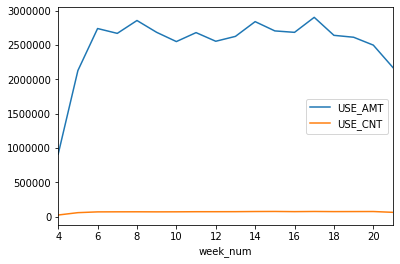

In [56]:
card_2019_flow.loc[510].plot()

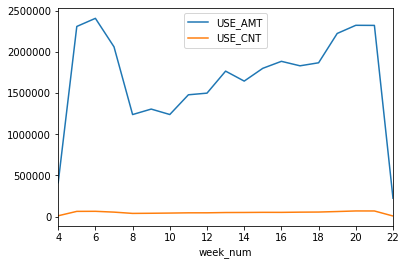

In [89]:
card_2020_flow.loc[510].plot()

# 연도, 동별 카드매출 변화 파악 함수

In [126]:
def DONG_CD (year, DONG_CD):
    #x = card_2019_flow.loc[DONG_CD].index
    #y1 = card_2019_flow.loc[DONG_CD]['USE_AMT']
    #y2 = card_2019_flow.loc[DONG_CD]['USE_CNT']
    
    if (year == 2019):
        card_year_flow = card_2019_flow
    elif (year==2020):
        card_year_flow = card_2020_flow
    else:
        "다시 입력해주세요"
    
    x = card_year_flow.loc[DONG_CD].index
    y1 = card_year_flow.loc[DONG_CD]['USE_AMT']
    y2 = card_year_flow.loc[DONG_CD]['USE_CNT']

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    line1 = ax1.plot(np.arange(len(x)), y1, color='b', linestyle='-', marker='o', label='USE_AMT')
    line2 = ax2.plot(np.arange(len(x)), y2, color='g', linestyle='-', marker='s', label='USE_CNT')

    ax1.set_xticklabels(x)
    ax1.set_xlabel('week_num')
    ax1.set_ylabel('USE_AMT')
    ax2.set_ylabel('USE_CNT')


    ax1.set_ylim()
    ax2.set_ylim()

    #lines = line1 + line2
    #labels = [l.get_label() for l in lines]
    plt.legend(loc='lower right')

    plt.grid(True)

    fig.tight_layout()
    plt.show()

# 업종별 카드매출 변화함수

In [98]:
card_2019_mct = card_2019.pivot_table(index=["MCT_CAT_CD","week_num"], values=["USE_CNT","USE_AMT"], aggfunc='sum')
card_2020_mct = card_2020.pivot_table(index=["MCT_CAT_CD","week_num"], values=["USE_CNT","USE_AMT"], aggfunc='sum')

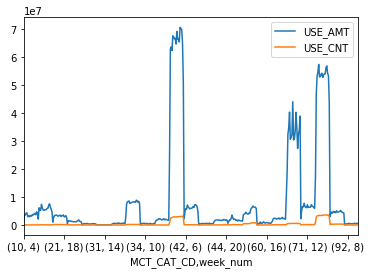

In [108]:
card_2019_mct.plot()

In [112]:
card_2019_mct.loc[40].index

Int64Index([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], dtype='int64', name='week_num')

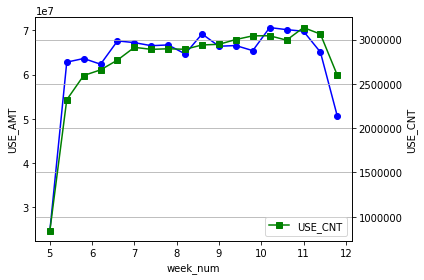

In [116]:

    
x = card_2019_mct.loc[40].index
y1 = card_2019_mct.loc[40]['USE_AMT']
y2 = card_2019_mct.loc[40]['USE_CNT']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

line1 = ax1.plot(np.arange(len(x)), y1, color='b', linestyle='-', marker='o', label='USE_AMT')
line2 = ax2.plot(np.arange(len(x)), y2, color='g', linestyle='-', marker='s', label='USE_CNT')

ax1.set_xticklabels(x)
ax1.set_xlabel('week_num')
ax1.set_ylabel('USE_AMT')
ax2.set_ylabel('USE_CNT')


ax1.set_ylim()
ax2.set_ylim()

#lines = line1 + line2
#labels = [l.get_label() for l in lines]
plt.legend(loc='lower right')

plt.grid(True)

fig.tight_layout()
plt.show()

In [117]:
def MCT_CAT_CD (year,mct):
    #x = card_2019_flow.loc[DONG_CD].index
    #y1 = card_2019_flow.loc[DONG_CD]['USE_AMT']
    #y2 = card_2019_flow.loc[DONG_CD]['USE_CNT']
    
    if (year == 2019):
        card_year_mct = card_2019_mct
    elif (year == 2020):
        card_year_mct = card_2020_mct
    else:
        "다시 입력해주세요"
    
    x = card_year_mct.loc[mct].index
    y1 = card_year_mct.loc[mct]['USE_AMT']
    y2 = card_year_mct.loc[mct]['USE_CNT']

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    line1 = ax1.plot(np.arange(len(x)), y1, color='b', linestyle='-', marker='o', label='USE_AMT')
    line2 = ax2.plot(np.arange(len(x)), y2, color='g', linestyle='-', marker='s', label='USE_CNT')

    ax1.set_xticklabels(x)
    ax1.set_xlabel('week_num')
    ax1.set_ylabel('USE_AMT')
    ax2.set_ylabel('USE_CNT')


    ax1.set_ylim()
    ax2.set_ylim()

    #lines = line1 + line2
    #labels = [l.get_label() for l in lines]
    plt.legend(loc='lower right')

    plt.grid(True)

    fig.tight_layout()
    plt.show()

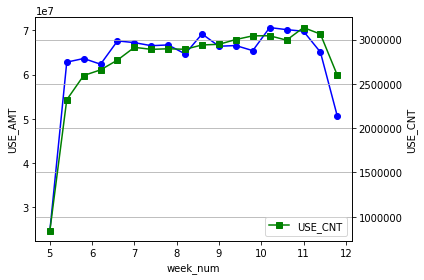

In [118]:
MCT_CAT_CD(2019,40)

# revised_dist_index < 0인 동
- 공릉1동(595), 동화동(665), 상계2동(640), 월계1동(560)

Text(0.5, 1.0, 'subplot 4: 월계1동')

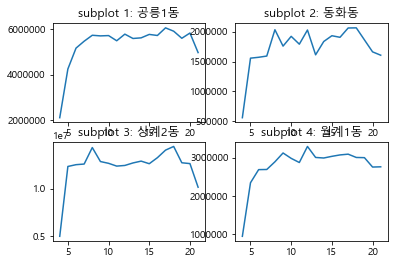

In [145]:
plt.subplot(2,2,1)
x = card_2019_flow.loc[595].index
y1 = card_2019_flow.loc[595]['USE_AMT']
plt.plot(x,y1)
plt.title("subplot 1: 공릉1동")

plt.subplot(2,2,2)
x = card_2019_flow.loc[665].index
y1 = card_2019_flow.loc[665]['USE_AMT']
plt.plot(x,y1)
plt.title("subplot 2: 동화동")

plt.subplot(2,2,3)
x = card_2019_flow.loc[640].index
y1 = card_2019_flow.loc[640]['USE_AMT']
plt.plot(x,y1)
plt.title("subplot 3: 상계2동")

plt.subplot(2,2,4)
x = card_2019_flow.loc[560].index
y1 = card_2019_flow.loc[560]['USE_AMT']
plt.plot(x,y1)
plt.title("subplot 4: 월계1동")